In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("credibility_dataset.csv")
df2 = pd.read_csv("test_data.csv")

In [3]:
df1.head()

,Unnamed: 0,id,body,title,url,label
0,0,0,"トップニュース June 28 , 2018 / 11 : 02 PM / 32 minut...",焦点 ： 貿易 戦争 より 「 手強い 脅威 」 、 中国 で 米 企業 が 直面 \n,https://jp.reuters.com/article/trade-war-cn-us...,False
1,51,51,※ 2 頁 目 に 衝撃 的 な 画像 を 掲載 し て い ます 。 苦手 な 方 は 文...,【 閲覧 注意 】 ジャンピング 追突 、 自殺 者 落下 、 殺人 的 巻き込み … 何 ...,http://tocana.jp/2017/12/post_15276_entry.html,True
2,567,567,エンドレス・ポエトリー 『 エル ・ トポ 』 （ 70 年 ） 、 『 ホーリー・マウンテ...,【 インタビュー 】 心臓 発作 を 起こし そう な ほど 芸術 的 ！ ホドロフスキー ...,http://tocana.jp/2017/11/post_15064_entry.html,True
3,161,161,"ワールド June 26 , 2018 / 3 : 05 AM / 3 days ago 2...",アングル ： 日 朝 交渉 、 安倍 首相 が 意欲 実務 協議 など ハードル も \n,https://jp.reuters.com/article/abe-north-korea...,False
4,1164,1164,2018 年 6 月 8 日 ～ 10 日 の 3 日間 にわたり 、 日産 スタジアム で...,「 東方 神 起が ゴリラ の マネ 」 、 日本人 蔑視 だ と 誤解 を 受け て ネッ...,http://mnsatlas.com/?p=36545,True


In [4]:
df2.head()

,body,label,title,url
0,本因坊 文裕 （ もん ゆう ） （ ２ ９ ） ＝ 井山 裕 太 九 段 ＝ が 、 挑戦...,False,読み の 文裕 、 貫禄 ７ 連覇 達成 \n,http://mainichi.jp/articles/20180702/k00/00m/0...
1,下野 市長 （ 栃木 県 ） 広瀬 寿雄 氏 （ ５ ９ ） ＝ 無 現 ［ 自 ］ ［ 公...,False,広瀬 寿雄 氏 が 無 投票 で ４ 選 \n,http://mainichi.jp/senkyo/articles/20180702/k0...
2,サッカー の スペイン 代表 Ｍ Ｆ イニエスタ （ ３ ４ ） が １ 日 、 ワールドカ...,False,イニエスタ が スペイン 代表 引退 表明 \n,http://mainichi.jp/articles/20180702/k00/00e/0...
3,自動車 の Ｆ１ シリーズ 第 ９ 戦 、 オーストリア ・ グランプリ （ ＧＰ ） は ...,False,フェルスタッペン 今季 初 Ｖ オーストリア ＧＰ \n,http://mainichi.jp/articles/20180702/k00/00m/0...
4,１ 日 の 東アジア 地域 包括 的 経済 連携 （ ＲＣＥＰ ） 閣僚 会合 は 、 １ ...,False,米 警戒 も 、 合意 実現 は 不透明 難航 分野 多く \n,http://mainichi.jp/articles/20180702/k00/00m/0...


In [6]:
df = pd.concat([df1[['title']], df2[['title']]])

In [18]:
df = df.sort_values(by="title")
df = df.drop_duplicates()
data = df['title'].tolist()

In [57]:
class  TfIdfWord2VecVectorizer:
    def __init__(self):
        pass

    def fit(self, X, y):
        self.tfidf_model = TfidfVectorizer(min_df=3, max_df=10).fit(X)
        return self

    def transform(self, X):
        return self.tfidf_and_w2v(X, self.tfidf_model)

    def texts_encoder(self, texts):
        with tf.Graph().as_default():
            embed = hub.Module("https://tfhub.dev/google/nnlm-ja-dim128/1")
            embeddings = embed(texts)
            with tf.Session() as sess:
                sess.run(tf.global_variables_initializer())
                sess.run(tf.tables_initializer())
                result = sess.run(embeddings)
        return result

    def tfidf_and_w2v(self, X, tfidf_model):
        tmp = tfidf_model.transform(X)
        a = tmp.toarray()
        if isinstance(X, pd.core.series.Series):
            X = X.tolist()
        b = self.texts_encoder(X)
        return np.hstack((a, b))

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
vectorizer = TfIdfWord2VecVectorizer().fit(data, None)
X = vectorizer.transform(data)

INFO:tensorflow:Initialize variable module/embeddings/part_0:0 from checkpoint b'/tmp/tfhub_modules/22c95b8e6878e472b6647f65afb10d88cafc52e0/variables/variables' with embeddings


In [67]:
kmeans = KMeans(n_clusters=100).fit(X)
results = kmeans.predict(X)

df['cluster'] = results

In [82]:
for i in range(100):
    counter = 3
    print("[cluster {}]".format(i))
    for i, d in df[df['cluster'] == i].iterrows():
        print(d['title'].replace("\n",""))
        counter -= 1
        if counter == 0:
            break
    print("")

[cluster 0]
豪 ＩＡＧ 、 タイ ・ インドネシア 事業 を 東京 海上 に 430 億 円 で 売却 へ 

[cluster 1]
「 虹 色 ｆａｎ ふ ぁ ー れ 」 元 メンバー ４ 人 和解 成立 
ウィリアム 王子 夫妻 の 第 ３ 子 名前 は アーサー ？ 、 アルバート ？ 
オリー 氏 ら 殿堂 入り 

[cluster 2]
“ 奇跡 ” の タコ 占い ７月 ２ 日 に ２ 代目 任命 
「 ブロック 塀 」 ４ ０ 年 前 の 教訓 継続 
「 １ ０ ０ ０ 年 に １ 匹 」 世界 最優秀 「 美 ジンコ 」 決まる これ は 嘘 ニュース です 

[cluster 3]
" ここ なら 笑 店 街 " 楢葉 復興 拠点 に 開店 
《 東京 外 環 道路 開通 記念 特別 企画 》 緊急 開催 決定 !!【 里見 八犬伝 ミステリー ツアー 】 ７月 ８ 日 開催 ！ 
「 かば焼き 発祥 は 浦和 」 江戸 時代 文献 基 に 宣言 

[cluster 4]
2018 年 、 日本 に 災い が 起こる ！ ？ 日月 神 示 の 間違っ た 予言 解釈 を 斬る ！ 
ASKA が 自分 を 叩い た 坂上 忍 と 井上 公 造 に 言及 ！ 坂上 は 「 いい 男 」 井上 は 「 ない ！ 」 … その 理由 は ？ 
FNS 歌謡 祭 は 大丈夫 ？ 欅 坂 46 ・ 平手 友 梨奈 “ 有線 大賞 で の 異変 ” の 裏 に 意外 な 理由 … 「 不協和音 を 歌え ない 」 

[cluster 5]
8 歳 の 天才 黒人 少年 が 明かし た “ 第 三 の 目 ” の 開き 方 が スゴ すぎる ！ 「 テレビ と 映画 は 害悪 」 高 次元 的 感覚 と 松 果 体 の 秘め られ た 関係 と は !? 
AV 親 バレ 問題 で 浮き彫り に なっ た 鈴木 涼 美 と 紗倉 ま な の 違い … AV へ の 嫌悪 を 受け入れる 鈴木 と 偏見 に 抗い 続ける 紗倉 
BPO 検証 で 『 ニュース 女子 』 沖縄 ヘイト 特集 の デタラメ 取材 の 実態 が 明らか に ！ 反対 派 へ の 誹謗 中傷 も 根拠 なし 

[cluster 6]
キューバ 、 ディアスカネル

In [98]:
from tqdm import tqdm_notebook
from collections import defaultdict
def word_counter(titles, table=defaultdict(int)):
    for i, d in titles:
        tmp = d['title'].replace("\n","").split()
        for t in tmp:
            if len(t) > 2:
                table[t] += 1
    return table

In [127]:
word_tables = []
for i in tqdm_notebook(range(100)):
    counter = 3
    word_table = word_counter(df[df['cluster'] == i].iterrows(), defaultdict(int))
    word_tables.append(word_table.items())

In [129]:
print("[要約]")
for i in range(100):
    print('[cluster {}] '.format(i) + ' '.join([x[0] for x in sorted(word_tables[i], key=lambda x: x[1], reverse=True)[:3]]))

[要約]
[cluster 0] ＩＡＧ インドネシア 430
[cluster 1] 大統領 ブッシュ ウィリアム
[cluster 2] トランプ ニュース システム
[cluster 3] 名古屋 カフェ オープン
[cluster 4] すぎる 芸能人 ニーズ
[cluster 5] すぎる マスコミ ネトウヨ
[cluster 6] トランプ ライアン キューバ
[cluster 7] シンガポール トランプ 大統領
[cluster 8] 見通し 寄り付き ハイテク
[cluster 9] ロイター 賃上げ ピーク
[cluster 10] 大統領 コロンビア ドゥケ
[cluster 11] 支払い トランプ ポルノ
[cluster 12] 北朝鮮 ネトウヨ 自民党
[cluster 13] 109 110 アルゼンチン
[cluster 14] 草なぎ SMAP やっぱり
[cluster 15] 北朝鮮 トランプ 大統領
[cluster 16] ニュース 見つかる ネット
[cluster 17] 財務省 自民党 口利き
[cluster 18] 神経質 109 110
[cluster 19] いたずら トイレ トランスジェンダー
[cluster 20] 北朝鮮 ミサイル 国防総省
[cluster 21] レストラン パトカー トロント
[cluster 22] トランプ ＦＢＩ 大統領
[cluster 23] 北朝鮮 ポンペオ マララ
[cluster 24] 大統領 トランプ 北朝鮮
[cluster 25] イスラエル パレスチナ 大使館
[cluster 26] 
[cluster 27] 車止め ひっかかり
[cluster 28] 新幹線 暴力団 シンクロ
[cluster 29] インタビュー どっち ブラック
[cluster 30] シリア 子ども ニュース
[cluster 31] ラジオ 松任谷 インターネット
[cluster 32] ニュース ダミー ドライバー
[cluster 33] ドアン トルコ 大統領
[cluster 34] 下回る スーパー チェーンストア
[cluster 35] ケネディ 最高裁 コラム
[cluster 36] 
[cluster 37] 値下がり
[cluster 38] 

In [130]:
import pandas as pd
df = pd.read_csv("afp.csv")

,body,day,title,url
0,内戦が続くシリアの南部で、ロシアの支援を受けた政府軍が進める軍事作戦により、27万人以上が避...,2018年7月3日 7:06,シリア南部の避難民27万人超える 政府軍攻勢で急増 国連発表,http://www.afpbb.com/articles/-/3180932
1,ドナルド・トランプ（Donald Trump）米大統領とメキシコの次期大統領に決まったアンド...,2018年7月3日 10:55,メキシコ次期大統領、トランプ氏と初の電話会談 「素晴らしい」滑り出し,http://www.afpbb.com/articles/-/3180945
2,中国の電気自動車メーカー、比亜迪集団（BYD）が青海省（Qinghai）に建設した車載電池工...,2018年7月3日 9:22,比亜迪の電池工場、青海で操業開始 世界最大規模,http://www.afpbb.com/articles/-/3180880
3,ベルギーとフランス、ドイツ3か国の当局は、フランスの首都パリ郊外で先月30日に開かれたイラン...,2018年7月3日 9:03,イラン反体制派の集会に攻撃計画か 欧州で外交官ら6人拘束,http://www.afpbb.com/articles/-/3180931
4,スペインのNGO「プロアクティバ・オープン・アームズ（Proactiva Open Arms...,2018年7月3日 12:13,動画：地中海で移民59人救助、スペインへ イタリアとマルタは入港拒否,http://www.afpbb.com/articles/-/3180976
5,悲惨な自動車事故に遭遇した南アフリカの女性が、救急隊に死亡と判断された後、収容された遺体安置...,2018年7月3日 9:30,「事故死」女性、遺体安置所の冷蔵室で生存確認 南ア,http://www.afpbb.com/articles/-/3180946
6,サラ・サンダース（Sarah Sanders）米大統領報道官は2日の記者会見で、ロシアによる...,2018年7月3日 9:59,「ロシアのクリミア併合認めない」 米大統領報道官が明言,http://www.afpbb.com/articles/-/3180944
7,ブラジルの航空機メーカー、エンブラエル（Embraer）は2日、米ボーイング（Boeing）...,2018年7月3日 11:13,エンブラエル、米ボーイングとの経営統合交渉「進んだ段階」,http://www.afpbb.com/articles/-/3180942
8,ドイツのアンゲラ・メルケル（Angela Merkel）首相は2日、移民問題で対立し辞任の意...,2018年7月3日 9:36,ドイツ首相と内相、移民問題で合意 連立崩壊の危機ひとまず去る,http://www.afpbb.com/articles/-/3180947
9,タイ北部チェンライ（Chiang Rai）県の洞窟で行方不明になり、9日ぶりに発見された少年...,2018年7月3日 8:26,動画：洞窟内で痩せ細った少年ら 発見の瞬間,http://www.afpbb.com/articles/-/3180941


In [140]:
#preprocessing
import MeCab
tagger = MeCab.Tagger("-Owakati")
data = []
for i, d in tqdm_notebook(df.iterrows()):
    try:
        title = tagger.parse(d['title'])
        body = tagger.parse(d['body'].split("。")[0])
        data.append((title+" "+body).replace("\n", ""))
    except:
        data.append("")

In [133]:
class Word2VecVectorizer:
    def __init__(self):
        pass

    def fit(self, X, y):
        return self

    def transform(self, X):
        if isinstance(X, pd.core.series.Series):
            X = X.tolist()        
        return self.texts_encoder(X)

    def texts_encoder(self, texts):
        with tf.Graph().as_default():
            embed = hub.Module("https://tfhub.dev/google/nnlm-ja-dim128/1")
            embeddings = embed(texts)
            with tf.Session() as sess:
                sess.run(tf.global_variables_initializer())
                sess.run(tf.tables_initializer())
                result = sess.run(embeddings)
        return result

In [141]:
vectorizer = Word2VecVectorizer().fit(data, None)
X = vectorizer.transform(data)

INFO:tensorflow:Initialize variable module/embeddings/part_0:0 from checkpoint b'/tmp/tfhub_modules/22c95b8e6878e472b6647f65afb10d88cafc52e0/variables/variables' with embeddings


In [159]:
cluster_max = 30

models = []
for i in range(cluster_max):
    kmeans = KMeans(n_clusters=(i+1)*5).fit(X)
    models.append(kmeans)
    print("{}:{}".format(i*5, kmeans.score(X)))

0:-113801.56926596165
5:-104742.55242085457
10:-100494.83934211731
15:-97767.54323542118
20:-95582.18919217587
25:-93817.80307900906
30:-92299.14567577839
35:-91047.82980632782
40:-90001.06487953663
45:-89073.41777944565
50:-88189.4725278616
55:-87381.43813896179
60:-86777.28558146954
65:-86124.14613640308
70:-85562.25270473957
75:-85054.72352194786
80:-84500.31620669365
85:-84083.43618237972


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


90:-83629.90568757057
95:-83170.65642428398
100:-82826.75189840794
105:-82431.17109310627
110:-82084.06604611874
115:-81787.05299007893
120:-81456.86233305931
125:-81138.31595444679
130:-80866.64517688751
135:-80600.62753236294
140:-80344.52272343636
145:-80096.9337502718


In [162]:
scores = []
for i in range(cluster_max):
    scores.append(((i+1)*5, models[i].score(X)))
    
scores = pd.DataFrame(scores, columns=["x", "y"])

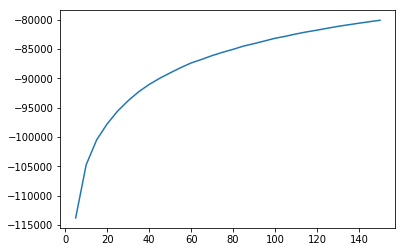

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(scores["x"], scores["y"])

In [165]:
kmeans = models[5]

In [169]:
df['cluster'] = kmeans.predict(X)
df['data'] = data

In [190]:
for i in range(30):
    print("[{}]".format(i))
    counter = 3
    for j, d in df[df['cluster'] == i].iterrows():
        print(d['data'])
        counter -= 1
        if counter == 0:
            break
    print("")

[0]
動画 ： 地中海 で 移民 59 人 救助 、 スペイン へ イタリア と マルタ は 入港 拒否  スペイン の NGO 「 プロアクティバ・オープン・アームズ （ Proactiva Open Arms ） 」 が 、 地中海 で 移民 59 人 を 救助 し た 
動画 ： イラク 、 シリア 国境 に 金属 フェンス 設置 「 侵入 」 妨げる ため  イラク の 国境 警察 は 6 月 29 日 、 西部 カイム （ Al - Qaim ） 近く の シリア と の 国境 沿い に 金属 フェンス を 設置 する 動画 を ネット 上 で 公開 し た 
動画 ： イスラエル の 医師 ら 、 シリア の 子ども たち 治療 ゴラン高原  イスラエル 占領 地 の ゴラン高原 （ Golan Heights ） で 、 同国 の 医療 関係 者 ら が 、 子ども を 含む 負傷 し た シリア の 民間 人 を 治療 し て いる 

[1]
ポンペオ 長官 、 再 訪朝 で 金 委員 長 と 会談 へ 5 日 に 出発  （ 更新 ） 米 ホワイトハウス （ White House ） は 2 日 、 マイク・ポンペオ （ Mike Pompeo ） 国務 長官 が 今月 5 日 に 北朝鮮 に 向け 出発 し 、 金 正 恩 （ キム ・ ジョン ウン 、 Kim Jong - Un ） 朝鮮 労働党 委員 長 と 会談 する と 発表 し た 
金 正 恩 氏 と 李 雪 主夫 人 、 化粧 品 工場 を 視察  北朝鮮 の 国営 朝鮮中央通信 （ KCNA ） に よる と 、 金 正 恩 （ キム ・ ジョン ウン 、 Kim Jong Un ） 朝鮮 労働党 委員 長 と 李 雪 主 （ リ・ソルジュ 、 Ri Sol - Ju ） 夫人 が 新 義 州 （ Sinuiju ） に ある 化粧 品 工場 を 視察 し た 
金 正 恩 氏 「 経済 制裁 は 苦痛 」 、 中国 に 解除 協力 求める 読売  北朝鮮 の 金 正 恩 （ キム ・ ジョン ウン 、 Kim Jong Un ） 朝鮮 労働党 委員 長 が 、 先日 訪中 し た 際 に 習近 平 （ Xi Jinping ） 国家 主席 に対し 、 対 北朝鮮 の 経済

In [186]:
import itertools
from nltk.corpus import stopwords

def get_japanese_stopwords():
    stps = stopwords.words('japanese')
    return stps + [''.join(list(stp)) for stp in list(itertools.product(stps, stps))]

def word_counter(titles, stps, table=defaultdict(int)):
    for i, d in titles:
        tmp = d['data'].replace("\n","").split()
        for t in tmp:
            if t not in stps:
                table[t] += 1
    return table

stps = get_japanese_stopwords()
word_tables = []
for i in tqdm_notebook(range(30)):
    counter = 3
    word_table = word_counter(df[df['cluster'] == i].iterrows(), stps, defaultdict(int))
    word_tables.append(word_table.items())

In [189]:
print("[要約]")
for i in range(30):
    print('[cluster {}] '.format(i) + ' '.join([x[0] for x in sorted(word_tables[i], key=lambda x: x[1], reverse=True)[:20]]))

[要約]
[cluster 0] デモ 抗議 政府 首都 万 中国 大統領 行わ 派 反 数 発表 イスラム 米 規模 大 - 活動 首相 事件
[cluster 1] 北朝鮮 金 - Kim キム 韓国 Jong 書記 正 恩 氏 総 大統領 ジョン 会談 ウン Un 委員 朝鮮 長
[cluster 2] 米 軍 政府 派 シリア イスラム イラク 組織 発表 大統領 反 攻撃 - 拘束 事件 ロシア IS 勢力 テロ 過激
[cluster 3] 国際 ショー 米 開幕 開催 中国 世界 航空 - 自動車 International 第 パリ Show ドイツ 最大 見本市 公開 回 行わ
[cluster 4] 米 軍 機 北朝鮮 ミサイル 韓国 中国 発射 発表 海軍 戦闘 ロシア 艦 軍事 演習 - 沖 政府 実験 基地
[cluster 5] 米 北朝鮮 大統領 核 政府 米国 イラン 問題 中国 協議 ロシア - 韓国 合意 中 的 会談 シリア 発表 長官
[cluster 6] 機 航空 事故 墜落 米 空港 旅客機 便 乗客 死亡 船 マレーシア 発表 着陸 Airlines 中 乗員 航空機 ロシア 不明
[cluster 7] 大統領 米 氏 候補 選 選挙 議員 上院 共和党 民主党 州 クリントン 指名 トランプ Obama Barack ＜ ＞ バラク・オバマ オバマ
[cluster 8] 大統領 米 氏 トランプ 首相 Trump ドナルド Donald 米国 ロシア 選 元 前 長官 政府 批判 中 受け 疑惑 英
[cluster 9] 市場 米 ドル 円 株式 原油 . 金融 世界 経済 ％ 発表 株 ユーロ 安 高値 更新 最 取引 NY
[cluster 10] 億 ％ 発表 . 円 米 比 万 約 期 前年 増 - ドル 中国 率 決算 兆 赤字 減
[cluster 11] 大統領 米 首相 会談 - W 長官 訪問 氏 中 ブッシュ . 首脳 米国 国務 外相 ロシア 中国 トランプ イラク
[cluster 12] 米 億 大手 発表 円 約 中国 ドル 買収 万 経営 英 政府 自動車 企業 - 会社 金融 米国 銀行
[cluster 13] 元 被告 米 判決 罪 裁判所 大統領 事件 容疑 - 起訴 有罪

0: 市民の政治運動
1: 韓国, 北朝鮮
2: 中東問題
3: 国際ショー, 見本市
4: 米国と韓国・北朝鮮・中国
5: 核問題
6: 航空機
7: 大統領選挙
8: ドナルド・トランプ
9: 経済
10: 経済
11: 米国, 会談
12: 企業経営
13: 裁判
14: メーカー企業
15: 大統領選挙
16: 中東問題
17: 福島の原子力発電所
18: 事故
19: 大統領
20: 国連
21: 事件
22: 中東問題
23: 国際
24: 社会問題
25: 殺人事件
26: 自然災害
27: 自然災害
28: 銃事件
29: 政府発表・法案

In [237]:
sents = []
sents.append("ドイツで事件 先日、ドイツで銃乱射事件が発生したが、けが人は出なかった")
sents.append("トランプ大統領、元大統領のオバマ氏を批判 先日、トランプ大統領がオバマ氏のオバマケア政策は有害な政策であると批判した")
sents.append("福島市民、原発反対運動を行う 先日、福島では市民による原発反対運動が行われていた")
sents.append("過去最大規模の地震が起こる 昨日午後、日本で最大規模の地震が起こった")
sents.append("メンサ会員、知的障害者を差別 昨日、日本のメンサ会員がTwitter上で知的障害者を差別する発言をしていたことがわかった")
sents.append("富山で洪水 昨日午後、富山県で洪水が引き起こり、3名が行方不明になっている")
sents.append("関税について、政府の公式見解発表 米国の関税引き上げ問題について、安倍政権は公式見解を発表した")
sents = list(map(tagger.parse, sents))
targets = Word2VecVectorizer().transform(sents)
kmeans.predict(targets)

INFO:tensorflow:Initialize variable module/embeddings/part_0:0 from checkpoint b'/tmp/tfhub_modules/22c95b8e6878e472b6647f65afb10d88cafc52e0/variables/variables' with embeddings


array([28,  7, 17, 27, 23, 27, 29], dtype=int32)

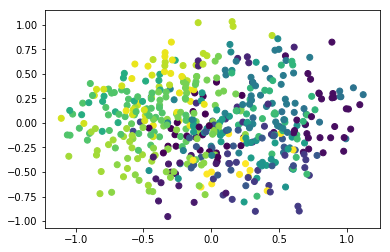

In [233]:
from sklearn.decomposition import PCA
num = 500

pca = PCA(n_components=2)
data_pca = pca.fit_transform(X[:num])
plt.scatter(data_pca[:,0], data_pca[:, 1], c=df.iloc[:num]["cluster"]) 

In [200]:
import pickle
with open("afp_cls_30.pkl", "wb") as f:
    pickle.dump(kmeans, f)

In [238]:
! wget http://192.168.88.180:18080/gitbucket/RD/anago/raw/master/data/embeddings/emb2.txt

--2018-07-04 13:21:16--  http://192.168.88.180:18080/gitbucket/RD/anago/raw/master/data/embeddings/emb2.txt
Connecting to 192.168.88.180:18080... connected.
HTTP request sent, awaiting response... 200 
Length: 415532749 (396M) [text/plain]
Saving to: ‘emb2.txt’

emb2.txt            100%[===================>] 396.28M  70.8MB/s    in 5.9s    

2018-07-04 13:21:22 (67.3 MB/s) - ‘emb2.txt’ saved [415532749/415532749]



In [239]:
from gensim.models import KeyedVectors
w2v = KeyedVectors.load_word2vec_format("emb2.txt", binary=False)

In [251]:
class GensimWord2VecVectorizer:
    def __init__(self, w2v, dim=200):
        self.w2v = w2v
        self.dim = dim

    def fit(self, X, y):
        return self

    def transform(self, X):
        if isinstance(X, pd.core.series.Series):
            X = X.tolist()        
        return self.texts_encoder(X)

    def get_vector(self, sent):
        results = []
        executed = False
        for word in sent.split():
            try:
                results.append(self.w2v.get_vector(word))
                executed = True
            except:
                pass
        if executed:
            return np.mean(results, axis=0)
        else:
            return np.zeros(self.dim)     
    
    def texts_encoder(self, texts):
        return list(map(self.get_vector, texts))

In [252]:
X = GensimWord2VecVectorizer(w2v).transform(df['data'])
kmeans = KMeans(n_clusters=30).fit(X)

In [253]:
df['cluster2'] = kmeans.predict(X)

In [255]:
df.to_csv("result_afp.csv", index=False)

In [258]:
stps = get_japanese_stopwords()
word_tables = []
for i in tqdm_notebook(range(30)):
    counter = 3
    word_table = word_counter(df[df['cluster2'] == i].iterrows(), stps, defaultdict(int))
    word_tables.append(word_table.items())

In [259]:
for i in range(30):
    print('[cluster {}] '.format(i) + ' '.join([x[0] for x in sorted(word_tables[i], key=lambda x: x[1], reverse=True)[:20]]))

[cluster 0] 州 米 中国 大 発生 首都 山 部 規模 万 避難 中 南部 地 メキシコ 地震 約 火事 数 観光
[cluster 1] 大統領 米 氏 - 首相 会談 元 金 北朝鮮 訪問 中国 中 長官 トランプ 首脳 Kim 会 前 発表 キム
[cluster 2] 大統領 米 首相 会談 - 訪問 政府 長官 W イラク 氏 ロシア 米国 元 政権 ブッシュ トランプ 中 軍 表明
[cluster 3] 軍 政府 派 シリア 勢力 反 米 イラク 武装 イスラム 戦闘 部隊 死亡 攻撃 組織 体制 イスラエル 空爆 ロシア 首都
[cluster 4] 大統領 米 氏 トランプ 首相 Trump ドナルド Donald 選 - 元 米国 北朝鮮 前 ロシア 候補 中 長官 中国 英
[cluster 5] 選挙 大統領 投票 選 議会 行わ 総 実施 米 国民 候補 首相 発表 - ％ 与党 率 結果 下院 支持
[cluster 6] 大統領 米 選 選挙 氏 候補 議員 上院 州 民主党 首相 共和党 指名 クリントン ＞ ＜ 投票 勝利 行わ Obama
[cluster 7] 米 中国 発表 大手 万 米国 世界 情報 的 販売 問題 明らか 当局 性 - 英 円 約 中 企業
[cluster 8] 米 発表 億 円 市場 ドル 政府 世界 中国 ％ 約 金融 経済 米国 . 万 大手 原油 欧州 -
[cluster 9] 事件 米 男 死亡 州 歳 女性 警察 逮捕 男性 中 容疑 殺害 少女 当局 遺体 発見 銃 前 万
[cluster 10] 死亡 負傷 州 少なくとも 死者 爆発 発生 米 更新 事故 部 中国 写真 追加 不明 首都 地震 以上 一部 南部
[cluster 11] 女性 男性 米 事件 中 男 ─ 歳 子ども 警察 中国 受け インド 大統領 的 少女 州 ？ 逮捕 明らか
[cluster 12] 億 円 ドル 約 米 発表 ％ 万 . 比 兆 期 - 前年 市場 増 中国 大手 決算 原油
[cluster 13] 国際 ショー 開幕 開催 自動車 米 第 Show 回 International 世界 航空 - 中国 見本市 記念 行わ 最大 写真 会
[cluster 14] イスラム 派 

In [268]:
sents = []
sents.append("ドイツで事件 先日、ドイツで銃乱射事件が発生したが、けが人は出なかった")
sents.append("トランプ大統領、元大統領のオバマ氏を批判 先日、トランプ大統領がオバマ氏のオバマケア政策は有害な政策であると批判した")
sents.append("福島市民、原発反対運動を行う 先日、福島では市民による原発反対運動が行われていた")
sents.append("過去最大規模の地震が起こる 昨日午後、日本で最大規模の地震が起こった")
sents.append("メンサ会員、知的障害者を差別 昨日、日本のメンサ会員がTwitter上で知的障害者を差別する発言をしていたことがわかった")
sents.append("富山で洪水 昨日午後、富山県で洪水が引き起こり、3名が行方不明になっている")
sents.append("関税について、政府の公式見解発表 米国の関税引き上げ問題について、安倍政権は公式見解を発表した")
sents = list(map(tagger.parse, sents))
targets = GensimWord2VecVectorizer(w2v).transform(sents)
kmeans.predict(targets)

array([23, 29, 24, 28, 22, 28, 24], dtype=int32)

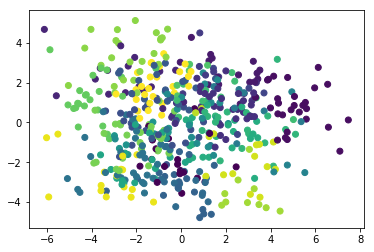

In [269]:
from sklearn.decomposition import PCA
num = 500

pca = PCA(n_components=2)
data_pca = pca.fit_transform(X[:num])
plt.scatter(data_pca[:,0], data_pca[:, 1], c=df.iloc[:num]["cluster2"]) 

In [270]:
kmeans.score(X)

-1987043.1611740347